In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%cd '../HOTS'

/home/antoine/hots/HOTS/HOTS


In [2]:
import os
import pickle
from mix_Network import *
dataset = 'cars'

if not os.path.isdir('../Records/EXP_03_NMNIST/'):
    %mkdir '../Records'
    %mkdir '../Records/EXP_05_NCARS/'

In [ ]:
tau = 1
homeo = True
hotshom = network(krnlinit='first', tau=tau, homeo=homeo)
arch = [hotshom.L[i].kernel.shape[1] for i in range(len(hotshom.L))]
fname = "../Records/EXP_05_NCARS/2020-12-03-mix_hots_"+dataset+hotshom.L[-1].krnlinit+str(tau)+str(homeo)+str(arch)+'.pkl'
if not os.path.isfile(fname):
    loaderhom, order = hotshom.learning1by1(dataset=dataset)
    trainmaphom, loaderhom, _ = hotshom.training(loaderhom, order)
    testmaphom, loaderhom, _ = hotshom.testing(loaderhom, order, trainmaphom)
    with open(fname, 'wb') as file:
        pickle.dump([hotshom, trainmaphom, testmaphom], file, pickle.HIGHEST_PROTOCOL)
else:
    with open(fname, 'rb') as file:
        hotshom, trainmaphom, testmaphom = pickle.load(file)
        
hotshom.plotlayer()
print('bhatta -> ',accuracy(trainmaphom, testmaphom, 'bhatta'))

Using downloaded and verified file: ../Data/Prophesee_Dataset_n_cars.zip
Extracting ../Data/Prophesee_Dataset_n_cars.zip to ../Data/
sensor formatting...


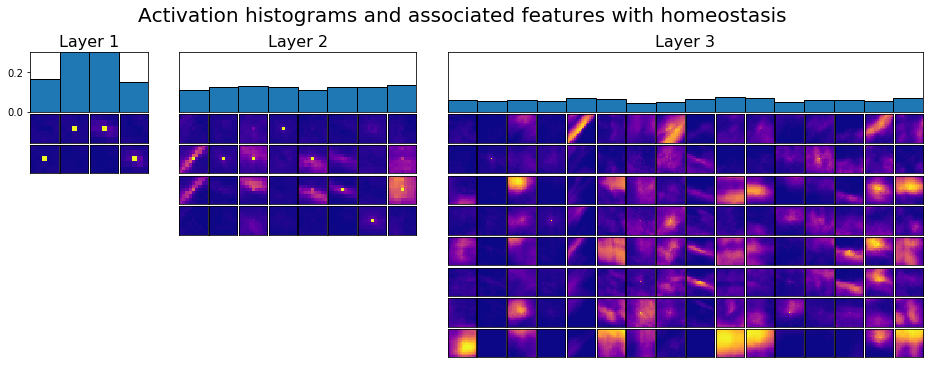

In [4]:
hotshom.plotlayer()